In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import pandas as pd
from src.visualization.plots import plot_score_differences
from src.data.tidy_data import prepare_data, create_pivot_table
from src.results.statistical_analysis import calculate_grouped_statistics, evaluate_differences, generate_difference_report, perform_post_hoc_analysis, identify_significant_differences
import warnings
warnings.filterwarnings('ignore')

In [19]:
df_score_differences = pd.read_parquet('data/results/score_differences_all_data.parquet')
df_performance_results = pd.read_parquet('data/results/performance_detailed_data.parquet')
df_description = pd.read_parquet('data/results/df_description_data.parquet')

In [20]:
df_score_differences

,dataset,metric_x,method,cv_score,k,metric_y,minority_class_complexity,most_complex_class,diff_score_minority_class_complexity,diff_score_most_complex_class
0,breastcancer,accuracy_score,SVC,0.978932,1,kdn,0.075472,0.075472,0.054404,0.054404
1,breastcancer,accuracy_score,SVC,0.978932,1,ddn,0.075472,0.075472,0.054404,0.054404
2,breastcancer,accuracy_score,SVC,0.978932,2,kdn,0.080189,0.080189,0.059121,0.059121
3,breastcancer,accuracy_score,SVC,0.978932,2,ddn,0.094481,0.094481,0.073413,0.073413
4,breastcancer,accuracy_score,SVC,0.978932,3,kdn,0.078616,0.078616,0.057548,0.057548
...,...,...,...,...,...,...,...,...,...,...
27475,w2a,scaled_mcc_score,best_method,0.734749,9,ddn,0.468131,0.468131,0.202880,0.202880
27476,w2a,scaled_mcc_score,best_method,0.734749,10,kdn,0.741121,0.741121,0.475871,0.475871
27477,w2a,scaled_mcc_score,best_method,0.734749,10,ddn,0.468318,0.468318,0.203067,0.203067
27478,w2a,scaled_mcc_score,best_method,0.734749,11,kdn,0.762107,0.762107,0.496856,0.496856


In [21]:
df_merged = prepare_data(df_description, df_score_differences, df_performance_results, 1)

In [22]:
df_merged = df_merged[df_merged['method'] == 'best_method']

In [23]:
df_merged

,dataset,metric_x,method,cv_score,k,metric_y,minority_class_complexity,most_complex_class,diff_score_minority_class_complexity,diff_score_most_complex_class,class_prop_category,minority_class_complexity_category,most_complex_class_category
8,breastcancer,accuracy_score,best_method,0.978932,1,kdn,0.075472,0.075472,0.054404,0.054404,0.3-0.4,0-0.1,0-0.1
9,breastcancer,accuracy_score,best_method,0.978932,1,ddn,0.075472,0.075472,0.054404,0.054404,0.3-0.4,0-0.1,0-0.1
18,a9a,accuracy_score,best_method,0.850035,1,kdn,0.375717,0.375717,0.225753,0.225753,0.2-0.3,0.3-0.4,0.3-0.4
19,a9a,accuracy_score,best_method,0.850035,1,ddn,0.423633,0.423633,0.273669,0.273669,0.2-0.3,0.4-0.5,0.4-0.5
28,fourclass,accuracy_score,best_method,1.000000,1,kdn,0.000000,0.000000,0.000000,0.000000,0.3-0.4,0-0.1,0-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,vehicle3,scaled_mcc_score,best_method,0.818034,1,ddn,0.528302,0.528302,0.346336,0.346336,0.2-0.3,0.4-0.5,0.4-0.5
2588,australian,scaled_mcc_score,best_method,0.875014,1,kdn,0.234528,0.234528,0.109542,0.109542,0.4-0.5,0.2-0.3,0.2-0.3
2589,australian,scaled_mcc_score,best_method,0.875014,1,ddn,0.232899,0.232899,0.107913,0.107913,0.4-0.5,0.2-0.3,0.2-0.3
2598,w2a,scaled_mcc_score,best_method,0.734749,1,kdn,0.345794,0.345794,0.080544,0.080544,0-0.1,0.3-0.4,0.3-0.4


## By complexity

In [24]:
for performance_metric in df_merged['metric_x'].unique():
    print(performance_metric)
    display(calculate_grouped_statistics(df_merged[df_merged['metric_x'] == performance_metric], diff='diff_score_most_complex_class', x_var='most_complex_class_category'))

accuracy_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.019269,0.020552,0.020905,0.000000,0.059916,11
1,0-0.1,kdn,0.019269,0.020623,0.020982,0.000000,0.060244,11
2,0.1-0.2,ddn,0.089465,0.080813,0.082953,-0.103577,0.173178,8
3,0.1-0.2,kdn,0.089465,0.079087,0.082126,-0.103577,0.173178,8
4,0.2-0.3,ddn,0.183530,0.183851,0.067583,0.091618,0.282651,15
5,0.2-0.3,kdn,0.188490,0.176065,0.066489,0.038988,0.282651,16
6,0.3-0.4,ddn,0.279763,0.261371,0.081322,0.069314,0.357719,9
7,0.3-0.4,kdn,0.270506,0.259116,0.072399,0.069314,0.337296,11
8,0.4-0.5,ddn,0.393316,0.399535,0.131566,0.146557,0.677778,22
9,0.4-0.5,kdn,0.392333,0.400838,0.138970,0.146557,0.677778,19


f1_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.001905,0.003894,0.039687,-0.099023,0.058444,11
1,0-0.1,kdn,0.001905,0.003965,0.039743,-0.099023,0.058771,11
2,0.1-0.2,ddn,0.031294,0.012511,0.064877,-0.126820,0.075449,8
3,0.1-0.2,kdn,0.031294,0.010786,0.065965,-0.126820,0.075449,8
4,0.2-0.3,ddn,0.070680,-0.020770,0.183956,-0.388638,0.145113,15
5,0.2-0.3,kdn,0.044312,-0.085392,0.215872,-0.430686,0.115381,16
6,0.3-0.4,ddn,0.052381,-0.007670,0.211993,-0.353460,0.259240,9
7,0.3-0.4,kdn,0.052381,0.031515,0.165603,-0.249528,0.259240,11
8,0.4-0.5,ddn,0.108772,0.105894,0.127903,-0.130524,0.436151,22
9,0.4-0.5,kdn,0.135191,0.123793,0.143347,-0.145937,0.437118,19


gps_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.011081,0.012331,0.029729,-0.052085,0.059821,11
1,0-0.1,kdn,0.011081,0.012403,0.029799,-0.052085,0.060148,11
2,0.1-0.2,ddn,0.069603,0.048994,0.065892,-0.110851,0.091133,8
3,0.1-0.2,kdn,0.069603,0.047269,0.065963,-0.110851,0.091133,8
4,0.2-0.3,ddn,0.091083,0.046780,0.137397,-0.236663,0.186869,15
5,0.2-0.3,kdn,0.062796,-0.004958,0.163146,-0.278711,0.165214,16
6,0.3-0.4,ddn,0.154490,0.083437,0.161575,-0.198159,0.274523,9
7,0.3-0.4,kdn,0.154490,0.120077,0.116084,-0.083092,0.274523,11
8,0.4-0.5,ddn,0.207866,0.208752,0.101628,0.021812,0.436961,22
9,0.4-0.5,kdn,0.215764,0.220370,0.124403,-0.047233,0.441260,19


scaled_mcc_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.012127,0.014846,0.025159,-0.027966,0.060149,11
1,0-0.1,kdn,0.012127,0.014918,0.025236,-0.027966,0.060476,11
2,0.1-0.2,ddn,0.074775,0.058205,0.065266,-0.098006,0.105438,8
3,0.1-0.2,kdn,0.074775,0.056479,0.065337,-0.098006,0.105438,8
4,0.2-0.3,ddn,0.099119,0.099467,0.075303,-0.038468,0.220681,15
5,0.2-0.3,kdn,0.076532,0.062449,0.090712,-0.080516,0.184334,16
6,0.3-0.4,ddn,0.186649,0.144145,0.099860,-0.020117,0.276418,9
7,0.3-0.4,kdn,0.186649,0.165322,0.078176,0.041309,0.276418,11
8,0.4-0.5,ddn,0.299048,0.287110,0.089009,0.142880,0.452507,22
9,0.4-0.5,kdn,0.308535,0.298493,0.096954,0.154301,0.475189,19


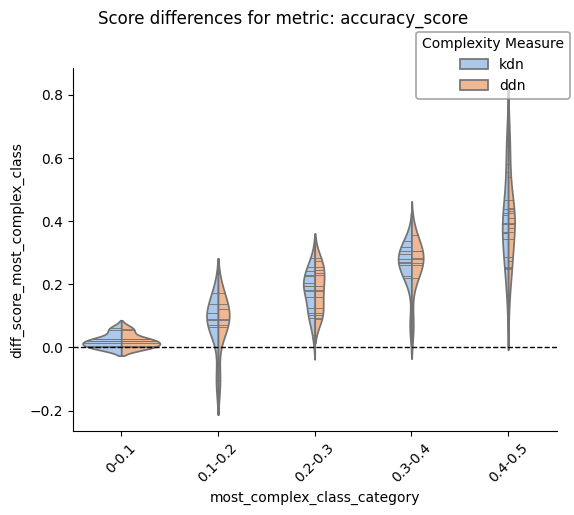

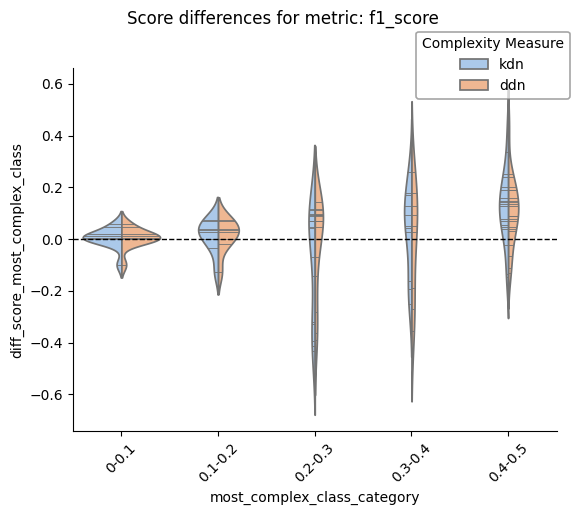

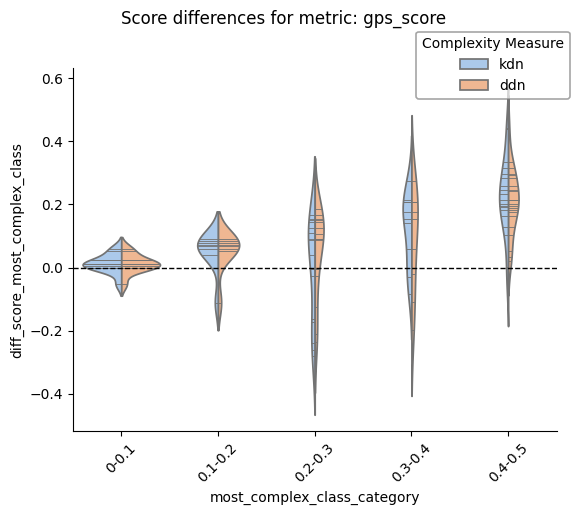

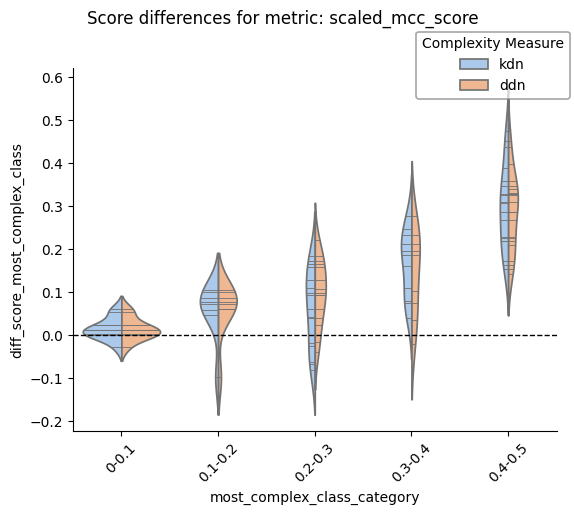

In [25]:
plot_score_differences(df_merged, diff='diff_score_most_complex_class', x_var='most_complex_class_category')

In [26]:
for performance_metric in df_merged['metric_x'].unique():
    print(performance_metric)
    display(calculate_grouped_statistics(df_merged[df_merged['metric_x'] == performance_metric], diff='diff_score_most_complex_class', x_var='minority_class_complexity_category'))

accuracy_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.019269,0.020552,0.020905,0.000000,0.059916,11
1,0-0.1,kdn,0.019269,0.020623,0.020982,0.000000,0.060244,11
2,0.1-0.2,ddn,0.091333,0.120387,0.141833,-0.103577,0.436986,9
3,0.1-0.2,kdn,0.091333,0.118961,0.142165,-0.103577,0.437954,9
4,0.2-0.3,ddn,0.183530,0.183851,0.067583,0.091618,0.282651,15
5,0.2-0.3,kdn,0.188490,0.176065,0.066489,0.038988,0.282651,16
6,0.3-0.4,ddn,0.279763,0.261371,0.081322,0.069314,0.357719,9
7,0.3-0.4,kdn,0.270506,0.259116,0.072399,0.069314,0.337296,11
8,0.4-0.5,ddn,0.392333,0.397752,0.134542,0.146557,0.677778,21
9,0.4-0.5,kdn,0.379351,0.398776,0.142700,0.146557,0.677778,18


f1_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.001905,0.003894,0.039687,-0.099023,0.058444,11
1,0-0.1,kdn,0.001905,0.003965,0.039743,-0.099023,0.058771,11
2,0.1-0.2,ddn,0.036885,0.059582,0.153701,-0.126820,0.436151,9
3,0.1-0.2,kdn,0.036885,0.058156,0.154929,-0.126820,0.437118,9
4,0.2-0.3,ddn,0.070680,-0.020770,0.183956,-0.388638,0.145113,15
5,0.2-0.3,kdn,0.044312,-0.085392,0.215872,-0.430686,0.115381,16
6,0.3-0.4,ddn,0.052381,-0.007670,0.211993,-0.353460,0.259240,9
7,0.3-0.4,kdn,0.052381,0.031515,0.165603,-0.249528,0.259240,11
8,0.4-0.5,ddn,0.088771,0.090167,0.107070,-0.130524,0.250549,21
9,0.4-0.5,kdn,0.131982,0.106386,0.125146,-0.145937,0.337065,18


gps_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.011081,0.012331,0.029729,-0.052085,0.059821,11
1,0-0.1,kdn,0.011081,0.012403,0.029799,-0.052085,0.060148,11
2,0.1-0.2,ddn,0.071519,0.092102,0.143260,-0.110851,0.436961,9
3,0.1-0.2,kdn,0.071519,0.090675,0.144099,-0.110851,0.437928,9
4,0.2-0.3,ddn,0.091083,0.046780,0.137397,-0.236663,0.186869,15
5,0.2-0.3,kdn,0.062796,-0.004958,0.163146,-0.278711,0.165214,16
6,0.3-0.4,ddn,0.154490,0.083437,0.161575,-0.198159,0.274523,9
7,0.3-0.4,kdn,0.154490,0.120077,0.116084,-0.083092,0.274523,11
8,0.4-0.5,ddn,0.201453,0.197885,0.090092,0.021812,0.333158,21
9,0.4-0.5,kdn,0.208609,0.208283,0.115964,-0.047233,0.441260,18


scaled_mcc_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.012127,0.014846,0.025159,-0.027966,0.060149,11
1,0-0.1,kdn,0.012127,0.014918,0.025236,-0.027966,0.060476,11
2,0.1-0.2,ddn,0.076694,0.100311,0.140297,-0.098006,0.437155,9
3,0.1-0.2,kdn,0.076694,0.098884,0.141134,-0.098006,0.438123,9
4,0.2-0.3,ddn,0.099119,0.099467,0.075303,-0.038468,0.220681,15
5,0.2-0.3,kdn,0.076532,0.062449,0.090712,-0.080516,0.184334,16
6,0.3-0.4,ddn,0.186649,0.144145,0.099860,-0.020117,0.276418,9
7,0.3-0.4,kdn,0.186649,0.165322,0.078176,0.041309,0.276418,11
8,0.4-0.5,ddn,0.287411,0.279965,0.084495,0.142880,0.452507,21
9,0.4-0.5,kdn,0.297947,0.290736,0.093501,0.154301,0.475189,18


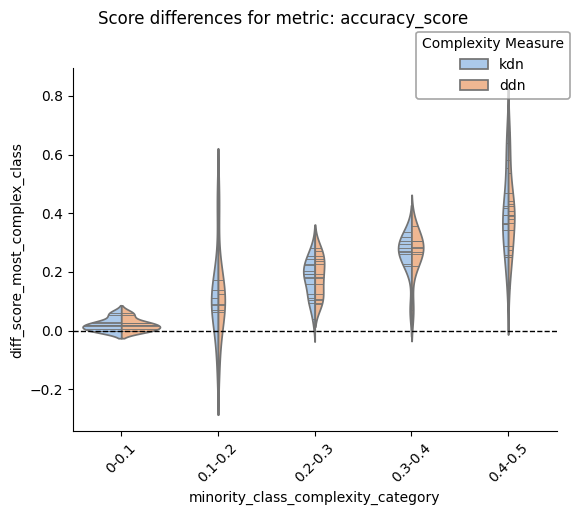

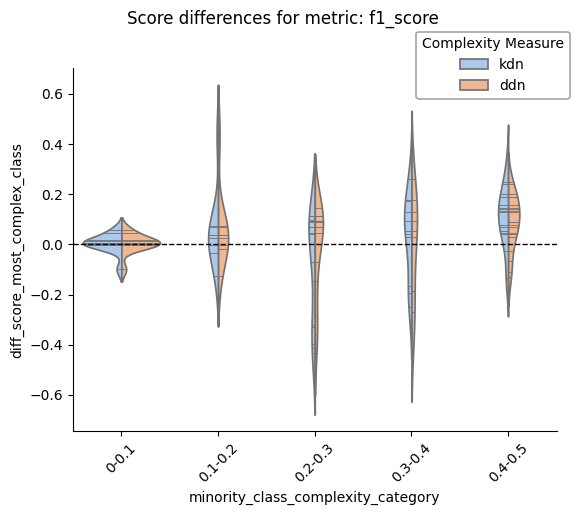

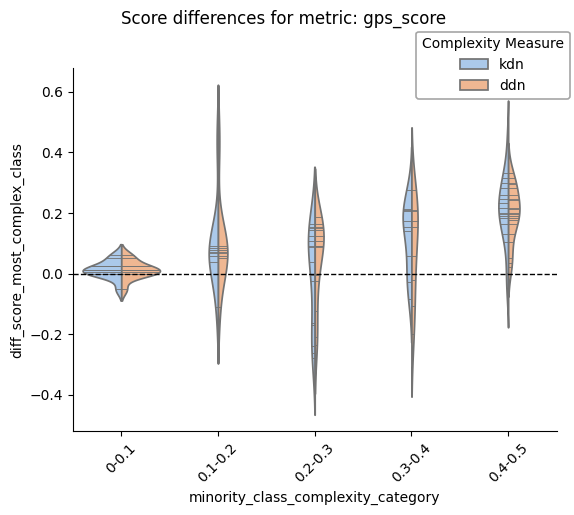

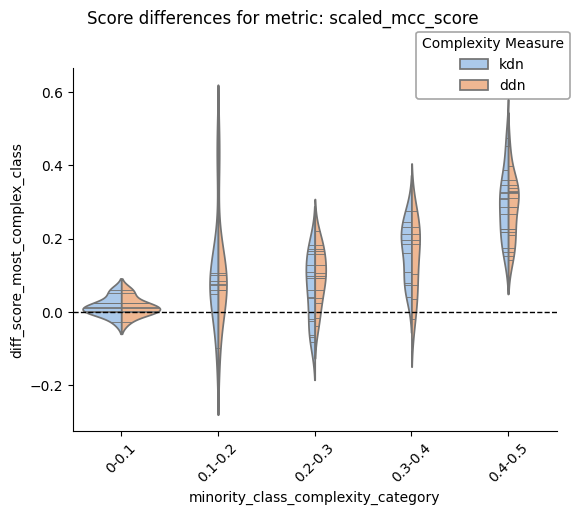

In [27]:
plot_score_differences(df_merged, diff='diff_score_most_complex_class', x_var='minority_class_complexity_category')

In [28]:
for performance_metric in df_merged['metric_x'].unique():
    print(performance_metric)
    display(calculate_grouped_statistics(df_merged[df_merged['metric_x'] == performance_metric], diff='diff_score_minority_class_complexity', x_var='most_complex_class_category'))

accuracy_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.019269,0.020194,0.021249,0.000000,0.059916,11
1,0-0.1,kdn,0.019269,0.020265,0.021326,0.000000,0.060244,11
2,0.1-0.2,ddn,0.089465,0.080813,0.082953,-0.103577,0.173178,8
3,0.1-0.2,kdn,0.089465,0.079087,0.082126,-0.103577,0.173178,8
4,0.2-0.3,ddn,0.183530,0.183851,0.067583,0.091618,0.282651,15
5,0.2-0.3,kdn,0.188490,0.176065,0.066489,0.038988,0.282651,16
6,0.3-0.4,ddn,0.279763,0.261371,0.081322,0.069314,0.357719,9
7,0.3-0.4,kdn,0.270506,0.259116,0.072399,0.069314,0.337296,11
8,0.4-0.5,ddn,0.391550,0.383820,0.146661,0.091259,0.677778,22
9,0.4-0.5,kdn,0.366370,0.382536,0.155701,0.090224,0.677778,19


f1_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.000000,0.003536,0.039705,-0.099023,0.058444,11
1,0-0.1,kdn,0.000000,0.003607,0.039761,-0.099023,0.058771,11
2,0.1-0.2,ddn,0.031294,0.012511,0.064877,-0.126820,0.075449,8
3,0.1-0.2,kdn,0.031294,0.010786,0.065965,-0.126820,0.075449,8
4,0.2-0.3,ddn,0.070680,-0.020770,0.183956,-0.388638,0.145113,15
5,0.2-0.3,kdn,0.044312,-0.085392,0.215872,-0.430686,0.115381,16
6,0.3-0.4,ddn,0.052381,-0.007670,0.211993,-0.353460,0.259240,9
7,0.3-0.4,kdn,0.052381,0.031515,0.165603,-0.249528,0.259240,11
8,0.4-0.5,ddn,0.089597,0.090179,0.104489,-0.130524,0.250549,22
9,0.4-0.5,kdn,0.128774,0.105491,0.121683,-0.145937,0.337065,19


gps_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.011081,0.011974,0.029864,-0.052085,0.059821,11
1,0-0.1,kdn,0.011081,0.012045,0.029935,-0.052085,0.060148,11
2,0.1-0.2,ddn,0.069603,0.048994,0.065892,-0.110851,0.091133,8
3,0.1-0.2,kdn,0.069603,0.047269,0.065963,-0.110851,0.091133,8
4,0.2-0.3,ddn,0.091083,0.046780,0.137397,-0.236663,0.186869,15
5,0.2-0.3,kdn,0.062796,-0.004958,0.163146,-0.278711,0.165214,16
6,0.3-0.4,ddn,0.154490,0.083437,0.161575,-0.198159,0.274523,9
7,0.3-0.4,kdn,0.154490,0.120077,0.116084,-0.083092,0.274523,11
8,0.4-0.5,ddn,0.199003,0.193037,0.090814,0.021812,0.333158,22
9,0.4-0.5,kdn,0.201453,0.202068,0.115907,-0.047233,0.441260,19


scaled_mcc_score


,most_complex_class_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.012127,0.014488,0.025357,-0.027966,0.060149,11
1,0-0.1,kdn,0.012127,0.014560,0.025435,-0.027966,0.060476,11
2,0.1-0.2,ddn,0.074775,0.058205,0.065266,-0.098006,0.105438,8
3,0.1-0.2,kdn,0.074775,0.056479,0.065337,-0.098006,0.105438,8
4,0.2-0.3,ddn,0.099119,0.099467,0.075303,-0.038468,0.220681,15
5,0.2-0.3,kdn,0.076532,0.062449,0.090712,-0.080516,0.184334,16
6,0.3-0.4,ddn,0.186649,0.144145,0.099860,-0.020117,0.276418,9
7,0.3-0.4,kdn,0.186649,0.165322,0.078176,0.041309,0.276418,11
8,0.4-0.5,ddn,0.287385,0.271395,0.091735,0.091428,0.452507,22
9,0.4-0.5,kdn,0.287359,0.280191,0.101830,0.090393,0.475189,19


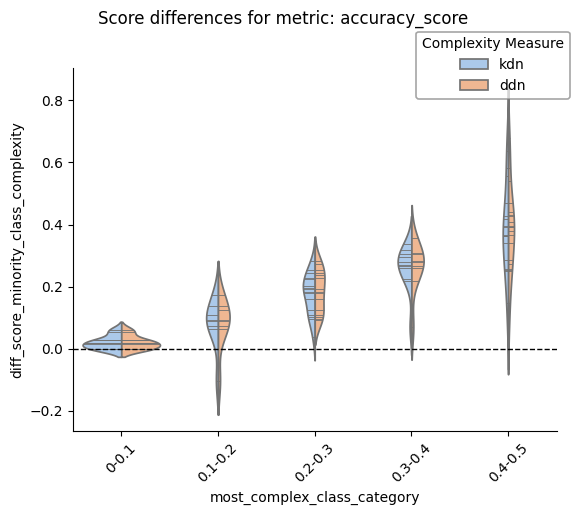

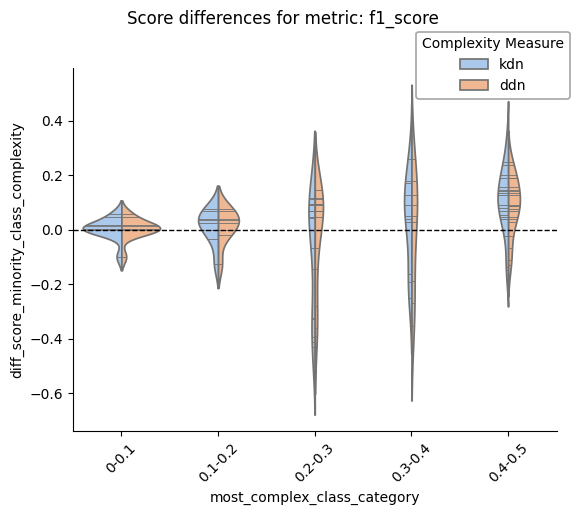

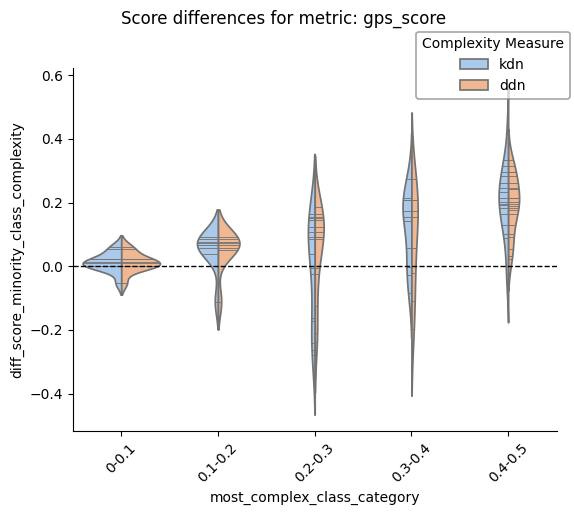

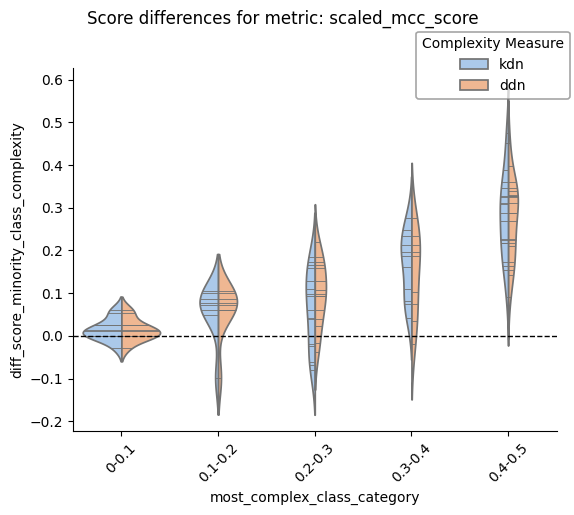

In [29]:
plot_score_differences(df_merged, diff='diff_score_minority_class_complexity', x_var='most_complex_class_category')

In [30]:
for performance_metric in df_merged['metric_x'].unique():
    print(performance_metric)
    display(calculate_grouped_statistics(df_merged[df_merged['metric_x'] == performance_metric], diff='diff_score_minority_class_complexity', x_var='minority_class_complexity_category'))

accuracy_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.019269,0.020194,0.021249,0.000000,0.059916,11
1,0-0.1,kdn,0.019269,0.020265,0.021326,0.000000,0.060244,11
2,0.1-0.2,ddn,0.091259,0.081973,0.077674,-0.103577,0.173178,9
3,0.1-0.2,kdn,0.090224,0.080325,0.076911,-0.103577,0.173178,9
4,0.2-0.3,ddn,0.183530,0.183851,0.067583,0.091618,0.282651,15
5,0.2-0.3,kdn,0.188490,0.176065,0.066489,0.038988,0.282651,16
6,0.3-0.4,ddn,0.279763,0.261371,0.081322,0.069314,0.357719,9
7,0.3-0.4,kdn,0.270506,0.259116,0.072399,0.069314,0.337296,11
8,0.4-0.5,ddn,0.392333,0.397752,0.134542,0.146557,0.677778,21
9,0.4-0.5,kdn,0.379351,0.398776,0.142700,0.146557,0.677778,18


f1_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.000000,0.003536,0.039705,-0.099023,0.058444,11
1,0-0.1,kdn,0.000000,0.003607,0.039761,-0.099023,0.058771,11
2,0.1-0.2,ddn,0.036885,0.021168,0.066010,-0.126820,0.090423,9
3,0.1-0.2,kdn,0.036885,0.019519,0.067037,-0.126820,0.089388,9
4,0.2-0.3,ddn,0.070680,-0.020770,0.183956,-0.388638,0.145113,15
5,0.2-0.3,kdn,0.044312,-0.085392,0.215872,-0.430686,0.115381,16
6,0.3-0.4,ddn,0.052381,-0.007670,0.211993,-0.353460,0.259240,9
7,0.3-0.4,kdn,0.052381,0.031515,0.165603,-0.249528,0.259240,11
8,0.4-0.5,ddn,0.088771,0.090167,0.107070,-0.130524,0.250549,21
9,0.4-0.5,kdn,0.131982,0.106386,0.125146,-0.145937,0.337065,18


gps_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.011081,0.011974,0.029864,-0.052085,0.059821,11
1,0-0.1,kdn,0.011081,0.012045,0.029935,-0.052085,0.060148,11
2,0.1-0.2,ddn,0.071519,0.053688,0.063224,-0.110851,0.091233,9
3,0.1-0.2,kdn,0.071519,0.052039,0.063341,-0.110851,0.091133,9
4,0.2-0.3,ddn,0.091083,0.046780,0.137397,-0.236663,0.186869,15
5,0.2-0.3,kdn,0.062796,-0.004958,0.163146,-0.278711,0.165214,16
6,0.3-0.4,ddn,0.154490,0.083437,0.161575,-0.198159,0.274523,9
7,0.3-0.4,kdn,0.154490,0.120077,0.116084,-0.083092,0.274523,11
8,0.4-0.5,ddn,0.201453,0.197885,0.090092,0.021812,0.333158,21
9,0.4-0.5,kdn,0.208609,0.208283,0.115964,-0.047233,0.441260,18


scaled_mcc_score


,minority_class_complexity_category,metric_y,median,mean,std,min,max,count
0,0-0.1,ddn,0.012127,0.014488,0.025357,-0.027966,0.060149,11
1,0-0.1,kdn,0.012127,0.014560,0.025435,-0.027966,0.060476,11
2,0.1-0.2,ddn,0.076694,0.061896,0.062047,-0.098006,0.105438,9
3,0.1-0.2,kdn,0.076694,0.060248,0.062153,-0.098006,0.105438,9
4,0.2-0.3,ddn,0.099119,0.099467,0.075303,-0.038468,0.220681,15
5,0.2-0.3,kdn,0.076532,0.062449,0.090712,-0.080516,0.184334,16
6,0.3-0.4,ddn,0.186649,0.144145,0.099860,-0.020117,0.276418,9
7,0.3-0.4,kdn,0.186649,0.165322,0.078176,0.041309,0.276418,11
8,0.4-0.5,ddn,0.287411,0.279965,0.084495,0.142880,0.452507,21
9,0.4-0.5,kdn,0.297947,0.290736,0.093501,0.154301,0.475189,18


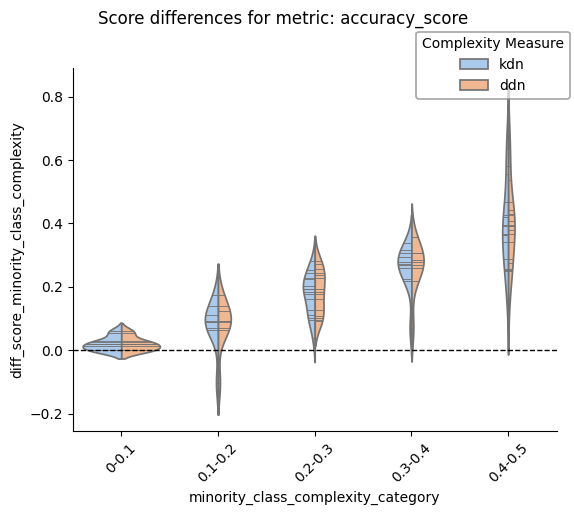

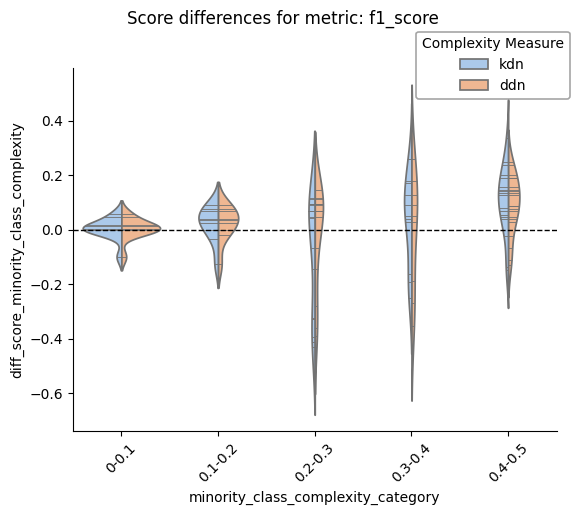

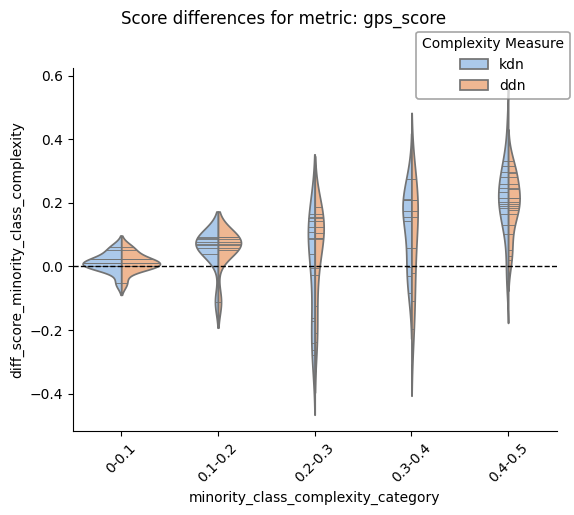

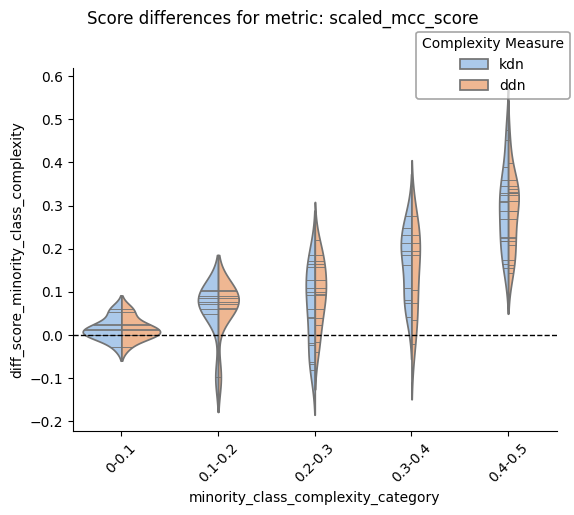

In [31]:
plot_score_differences(df_merged, diff='diff_score_minority_class_complexity', x_var='minority_class_complexity_category')